In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import requests
# Turn off warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
CVD_data_to_load = Path("datasets/CVD_cleaned.csv")
CVD_data_df = pd.read_csv(CVD_data_to_load)

In [3]:
# Prepare some data for further analysis
sex_df = CVD_data_df.groupby(['Sex'])['Sex'].count()


# Analysis of the Incidence of Depression by Sex

In [4]:
Depression_by_sex=CVD_data_df.groupby(['Depression','Sex'])['Depression'].count()
Depression_by_sex

Depression  Sex   
No          Female    119351
            Male      127602
Yes         Female     40845
            Male       21056
Name: Depression, dtype: int64

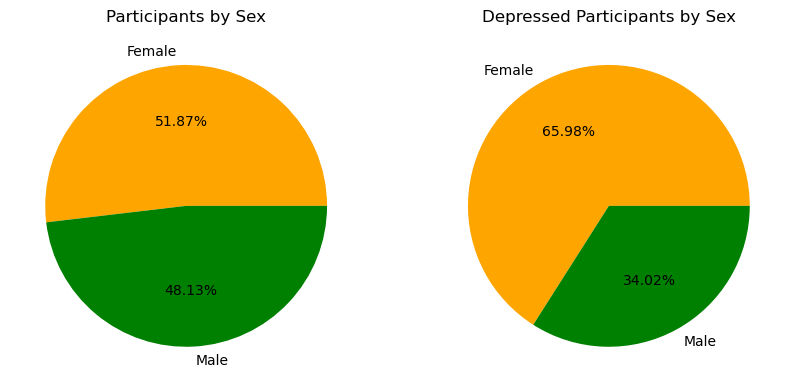

In [5]:
fig1, axes = plt.subplots(1,2, figsize=(10,10))

axes[0].pie(sex_df, labels=['Female','Male'], autopct='%2.2f%%', colors=['orange','green'] )
axes[0].set_title('Participants by Sex')
axes[1].pie(Depression_by_sex['Yes'], labels=['Female', 'Male'], autopct='%2.2f%%', colors=['orange','green'] )
axes[1].set_title('Depressed Participants by Sex')
plt.savefig("output_data/Depression_by_Sex.png")
plt.show()

In [6]:
Depression_by_sex

Depression  Sex   
No          Female    119351
            Male      127602
Yes         Female     40845
            Male       21056
Name: Depression, dtype: int64

In [8]:
observed =[]
expected=[]
observed = pd.Series([Depression_by_sex[0],Depression_by_sex[1]], index=['Female','Male'])
expected = pd.Series([Depression_by_sex[2],Depression_by_sex[3]], index=['Female','Male'])
myChisqr3 = pd.DataFrame([observed, expected]).T
myChisqr3.columns = [['No Depression', 'With Depression']]

myChisqr3

,No Depression,With Depression
Female,119351,40845
Male,127602,21056


## Chi-Square Contingency Table Analysis of Depression vs Sex:
### Alternative Hypothesis:
The incidence of depression is related to the sex of an individual.

### Null Hypothesis:
The distribution of individuals having depression by sex is the same as the distribution of individuals by sex for individuals who don't have Arthritis and therefore depression is unrelated to the sex of the individual and the variance we are seeing is by chance.

In [9]:
chi2_stat, p_value, dof, expected = st.chi2_contingency(myChisqr3)
print('Chi 2 Stat ', chi2_stat)
print('P-value ', p_value)
print('Degrees of Freedom ', dof)
print('Expected ', expected)
print(f'The P-value of {p_value}, is less than 0.05 so we must reject the null hypothesis in favour of the alternative')

Chi 2 Stat  6178.8661558934
P-value  0.0
Degrees of Freedom  1
Expected  [[128089.26802955  32106.73197045]
 [118863.73197045  29794.26802955]]
The P-value of 0.0, is less than 0.05 so we must reject the null hypothesis in favour of the alternative


### Analysis:
Using the distribution of individuals who do not have depression by sex and comparing that to the observed distribution of individuals who have depression by sex, the chi-square contingency analysis results in a p-value of 0.0. This suggests there is no statistical relationship between the two groups and the observed variation we see is not happening by chance and we must reject the null hypothesis and assume the changes in the incidence of depression by sex is significant. 

In [10]:
depression_by_age = pd.DataFrame({'Female':CVD_data_df.loc[(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Depression'].count(),
                                 'Male':CVD_data_df.loc[(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Depression'].count(),
                                 'Female Yes':CVD_data_df.loc[(CVD_data_df['Depression']=='Yes')&(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Depression'].count(),
                                 'Female No':CVD_data_df.loc[(CVD_data_df['Depression']=='No')&(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Depression'].count(),
                                 'Male Yes':CVD_data_df.loc[(CVD_data_df['Depression']=='Yes')&(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Depression'].count(),
                                 'Male No':CVD_data_df.loc[(CVD_data_df['Depression']=='No')&(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Depression'].count(),
                                })


In [11]:
depression_by_age['Percent Yes Female'] = depression_by_age['Female Yes']/depression_by_age[['Female Yes','Female No']].sum(axis=1)*100
depression_by_age['Percent Yes Male'] = depression_by_age['Male Yes']/depression_by_age[['Male Yes','Male No']].sum(axis=1)*100
depression_by_age


,Female,Male,Female Yes,Female No,Male Yes,Male No,Percent Yes Female,Percent Yes Male
Age_Category,,,,,,,,
18-24,8215,10466,2857,5358,1931,8535,34.777845,18.450220
25-29,7118,8376,2538,4580,1537,6839,35.656083,18.350048
30-34,8963,9465,2874,6089,1691,7774,32.065157,17.865821
35-39,10367,10239,3127,7240,1778,8461,30.163017,17.364977
40-44,11203,10392,3232,7971,1635,8757,28.849415,15.733256
45-49,11000,9968,3149,7851,1440,8528,28.627273,14.446228
50-54,12968,12129,3637,9331,1774,10355,28.045959,14.626103
55-59,14660,13394,4032,10628,1938,11456,27.503411,14.469165
60-64,16969,15449,4543,12426,2157,13292,26.772350,13.962069


In [12]:
myChisqr2 = depression_by_age[['Female','Male']]
chi2_stat, p_value, dof, expected = st.chi2_contingency(myChisqr2)
print('Chi 2 Stat ', chi2_stat)
print('P-value ', p_value)
print('Degrees of Freedom ', dof)
print('Expected ', expected)
print(f'The P-value of {p_value}, is less than 0.05 so we must reject the null hypothesis in favour of the alternative')

Chi 2 Stat  1391.3318267764926
P-value  1.028213032361724e-290
Degrees of Freedom  12
Expected  [[ 9689.43732637  8991.56267363]
 [ 8036.40821877  7457.59178123]
 [ 9558.21160807  8869.78839193]
 [10687.89387866  9918.10612134]
 [11200.86714111 10394.13285889]
 [10875.65557836 10092.34442164]
 [13017.28004818 12079.71995182]
 [14551.01304824 13502.98695176]
 [16814.52701924 15603.47298076]
 [17341.50460735 16092.49539265]
 [16132.46449131 14970.53550869]
 [10739.24307278  9965.75692722]
 [11551.49396155 10719.50603845]]
The P-value of 1.028213032361724e-290, is less than 0.05 so we must reject the null hypothesis in favour of the alternative


In [13]:
myChisqr2

,Female,Male
Age_Category,,
18-24,8215,10466
25-29,7118,8376
30-34,8963,9465
35-39,10367,10239
40-44,11203,10392
45-49,11000,9968
50-54,12968,12129
55-59,14660,13394
60-64,16969,15449


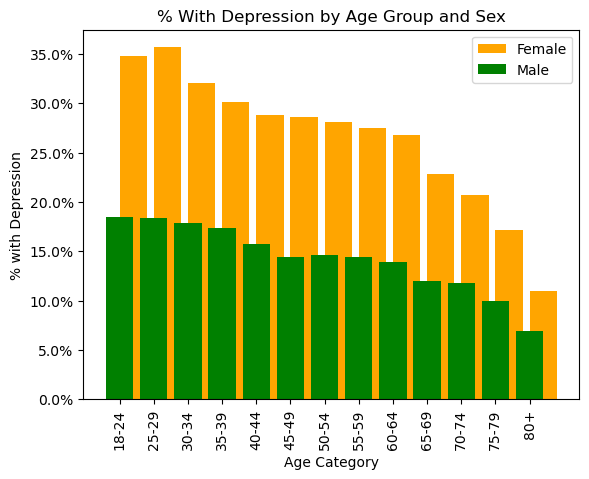

In [14]:
ax = plt.subplot()
group1=depression_by_age['Percent Yes Female']
group2=depression_by_age['Percent Yes Male']
plt.bar(depression_by_age.index, group1, align='edge', color='orange', label='Female')
plt.bar(depression_by_age.index, group2, align='center', color = 'green', label='Male')
plt.xlabel('Age Category')
plt.xticks(rotation=90)
plt.ylabel('% with Depression')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f%%'))
# plt.tick_params(rotation=90)
plt.legend(['Female', 'Male'], loc='upper right')
plt.title('% With Depression by Age Group and Sex')
plt.savefig("output_data/Fig1.png")

plt.savefig("output_data/Depression_by_age_category.png")

plt.show()

# Conclusions:
We detected a strong relationship between the incidence of depression and sex, where women experience depression at a higher rate than men.  This variance holds through all age categories.  Unlike the incidence of Arthritis however, the incidence of depression appears to decline as individuals age.